<a href="https://colab.research.google.com/github/guzun0325/pyTorch-Deep-learning/blob/main/AlexNet_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
if(torch.cuda.is_available()):
    device = torch.device("cuda")
    print(device, torch.cuda.get_device_name(0))
else:
    device= torch.device("cpu")
    print(device)

cuda Tesla T4


#Load ImageNet pre-trained AlexNet

In [ ]:
import torchvision
model = torchvision.models.alexnet(pretrained=True)

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:06<00:00, 38.4MB/s]


In [ ]:
model.eval()
model.to(device)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

#Upload an image file to Colab

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Capybara_(Hydrochoerus_hydrochaeris).JPG to Capybara_(Hydrochoerus_hydrochaeris).JPG


In [ ]:
fnameLst = list(uploaded.keys())
fname = fnameLst[0]
print(fname)

Capybara_(Hydrochoerus_hydrochaeris).JPG


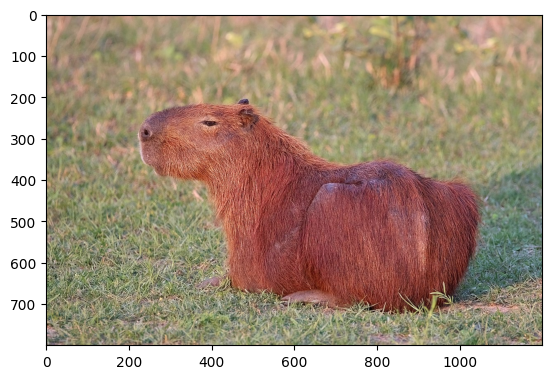

In [ ]:
import cv2
import matplotlib.pyplot as plt
image = cv2.imread(fname)
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

# Image processing - resize, center crop, standarize to [0, 1], normalized to N(0,1)

In [ ]:
from torchvision import transforms
transformer = transforms.Compose([
     transforms.Resize(224),
     transforms.CenterCrop(224),
     transforms.ToTensor(),
     transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5] )])

In [ ]:
from PIL import Image
PILImg= Image.fromarray(image.astype('uint8')).convert('RGB')
PILImg = transformer(PILImg)
PILImg.shape

torch.Size([3, 224, 224])

#Prepare the correct input format

In [ ]:
imageTensor = torch.unsqueeze(PILImg, 0)
imageTensor.shape

torch.Size([1, 3, 224, 224])

#Apply 1st convolution and pooling

In [ ]:
conv1 = model.features[0]
print(conv1)
#InChannel=3(RGB),OutChannel=64, filter size=11, stride=4, padding=2

Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))


In [ ]:
weight1 = conv1.weight.data.cpu().numpy()
print(weight1.shape)
#64 filters, depth=3, size =11 by 11

(64, 3, 11, 11)


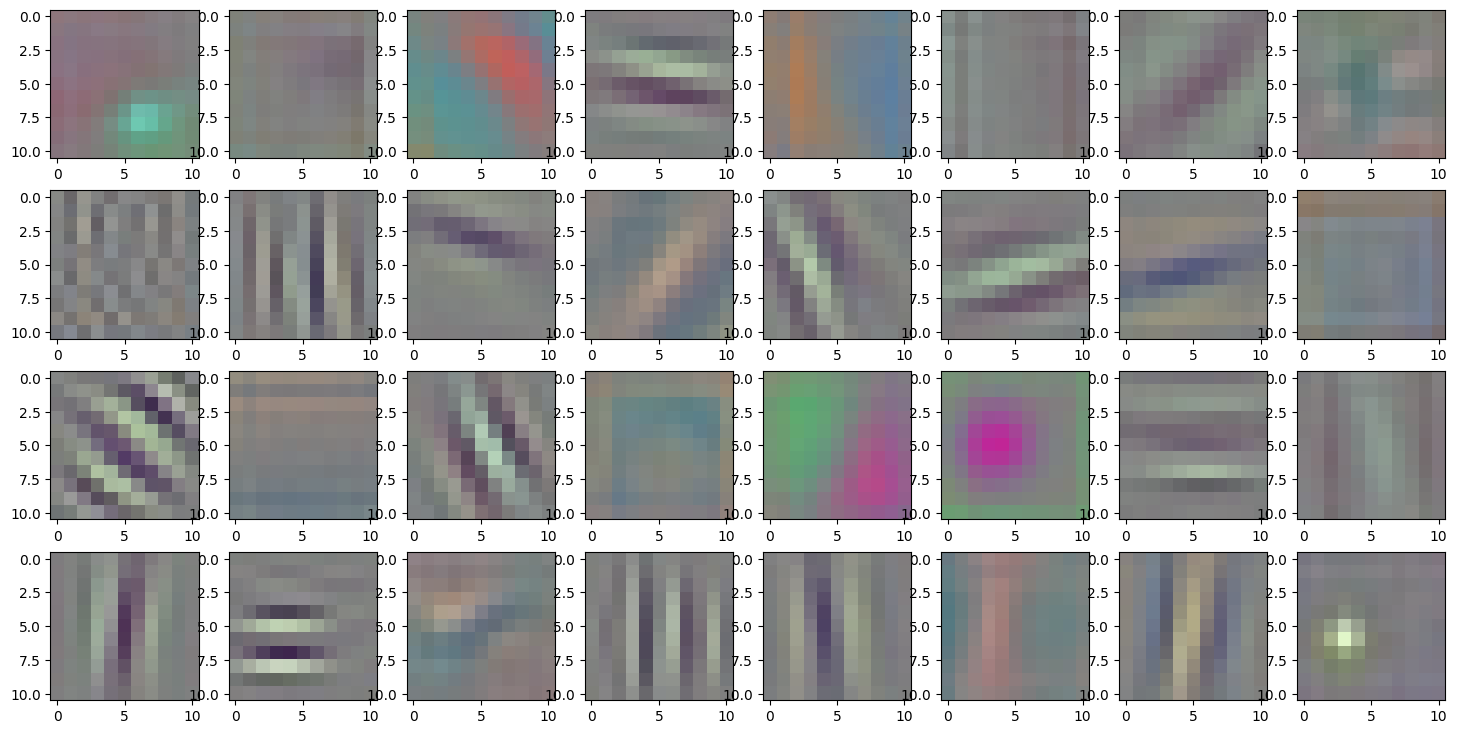

In [ ]:
# Visualize the first 32 of the filter weights
import numpy as np
fig=plt.figure(figsize=(18, 9))
for i in range(32):
  fig.add_subplot(4, 8, i+1)
  w = weight1[i]
  ImgArray = np.zeros((w.shape[1], w.shape[2], 3))
  ImgArray[:,:,0] = w[0, :, :]
  ImgArray[:,:,1] = w[1, :, :]
  ImgArray[:,:,2] = w[2, :, :]
  ImgArray = ImgArray*0.5+0.5  # convert[-1, 1] to [0, 1]
  plt.imshow(ImgArray)
plt.show()

In [ ]:
conv1_out = conv1(imageTensor.to(device))
conv1_out.shape
#output image (feature map) has 64 channels

torch.Size([1, 64, 55, 55])

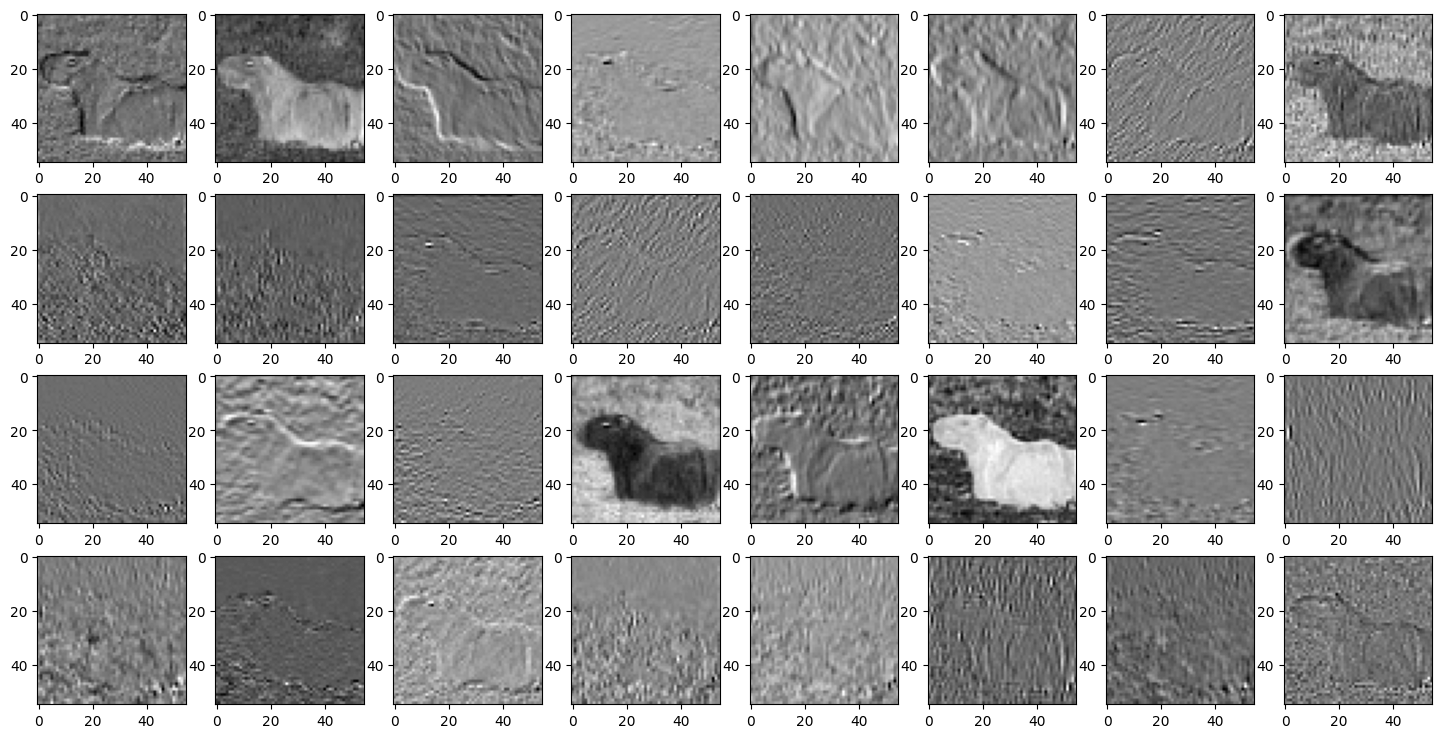

In [ ]:
# Visualize the first 32 channels of the output feature map
imgArray=conv1_out[0].data.cpu().numpy()
fig=plt.figure(figsize=(18, 9))
for i in range(32):
    fig.add_subplot(4, 8, i+1)
    plt.imshow(imgArray[i], cmap='gray')
plt.show()

torch.Size([1, 64, 27, 27])


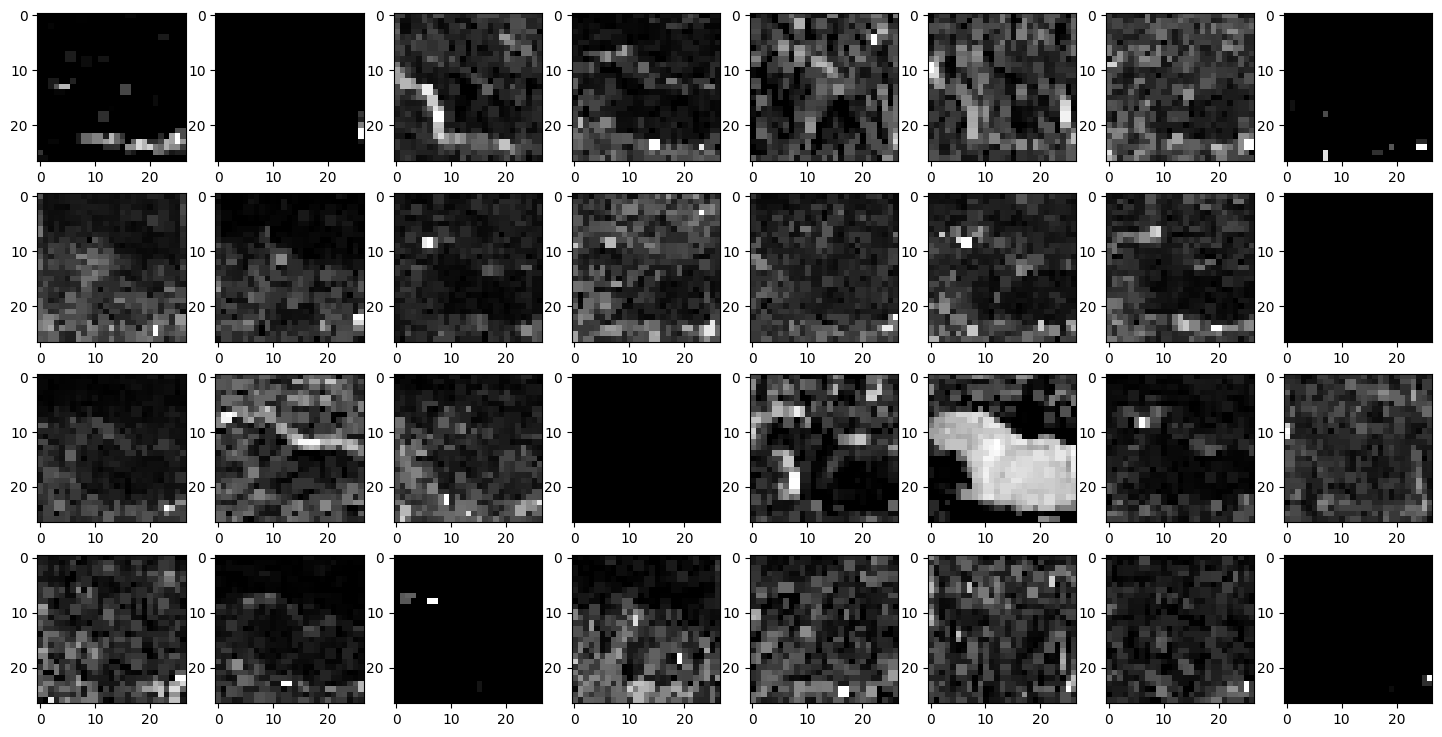

In [ ]:
# Max pooling
conv1_pooling = model.features[1:3]
conv1_out1 = conv1_pooling(conv1_out)
print(conv1_out1.shape)
imgArray=conv1_out1[0].data.cpu().numpy()
fig=plt.figure(figsize=(18, 9))
for i in range(32): #visualize the first 32 channels
  fig.add_subplot(4, 8, i+1)
  plt.imshow(imgArray[i], cmap='gray')
plt.show()

#Pass the output feature map to the 2nd convolution and pooling

torch.Size([1, 192, 27, 27])


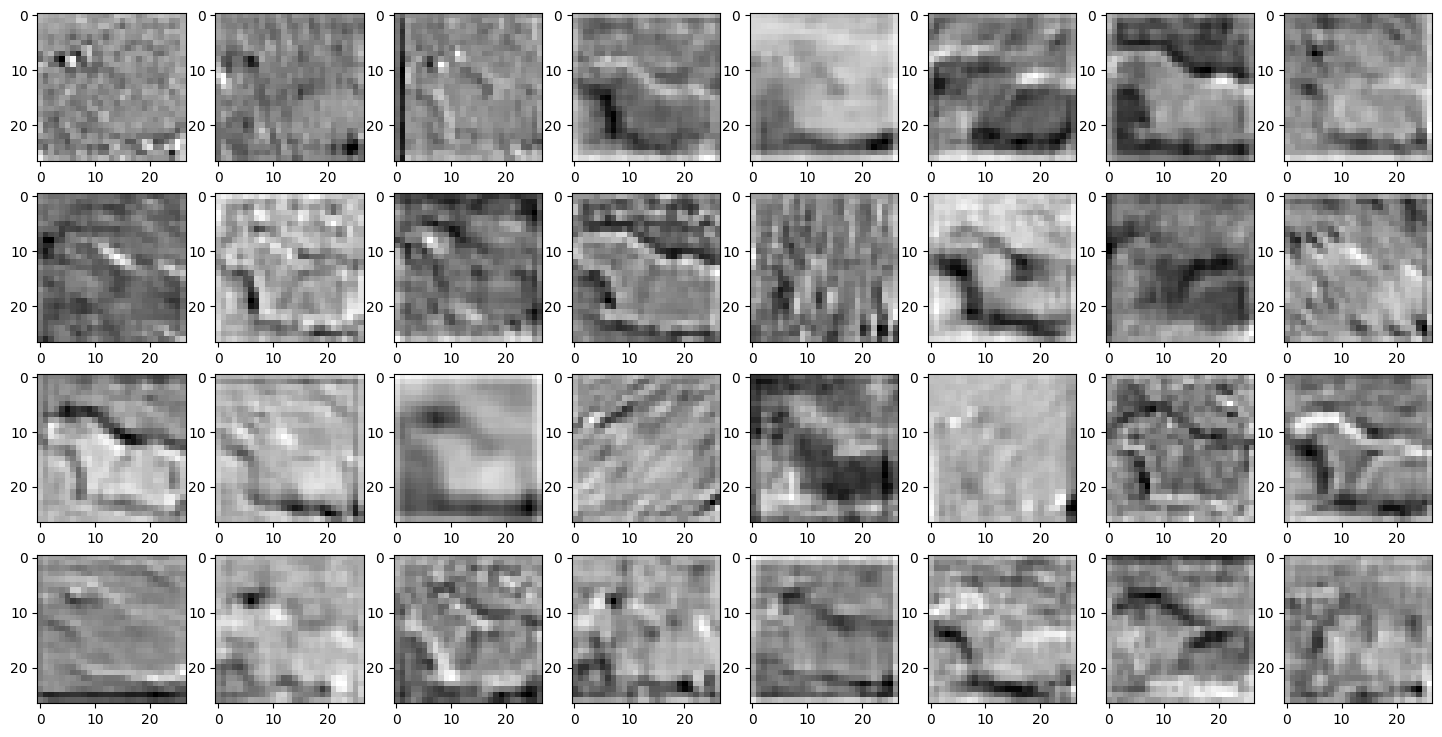

In [ ]:
conv2 = model.features[3]
conv2_out = conv2(conv1_out1)
print(conv2_out.shape)
imgArray=conv2_out[0].data.cpu().numpy()
fig=plt.figure(figsize=(18, 9))
for i in range(32): #visualize the first 32 channels
  fig.add_subplot(4, 8, i+1)
  plt.imshow(imgArray[i], cmap='gray')
plt.show()

torch.Size([1, 192, 13, 13])


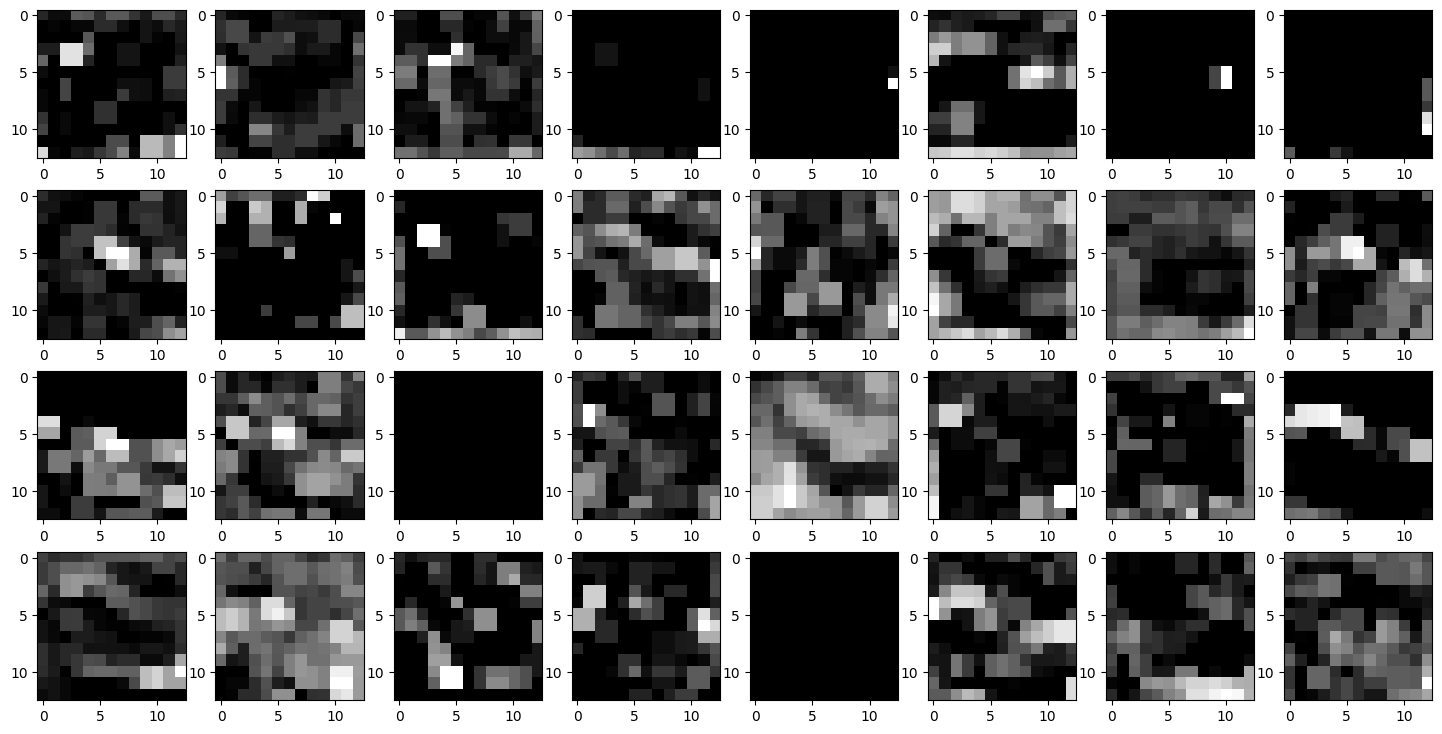

In [ ]:
# Max pooling
conv2_pooling = model.features[4:6]
conv2_out1 = conv2_pooling(conv2_out)
print(conv2_out1.shape)
imgArray=conv2_out1[0].data.cpu().numpy()
fig=plt.figure(figsize=(18, 9))
for i in range(32): #visualize the first 32 channels
  fig.add_subplot(4, 8, i+1)
  plt.imshow(imgArray[i], cmap='gray')
plt.show()

#Pass the output feature map to 3rd convolution and pooling

torch.Size([1, 384, 13, 13])


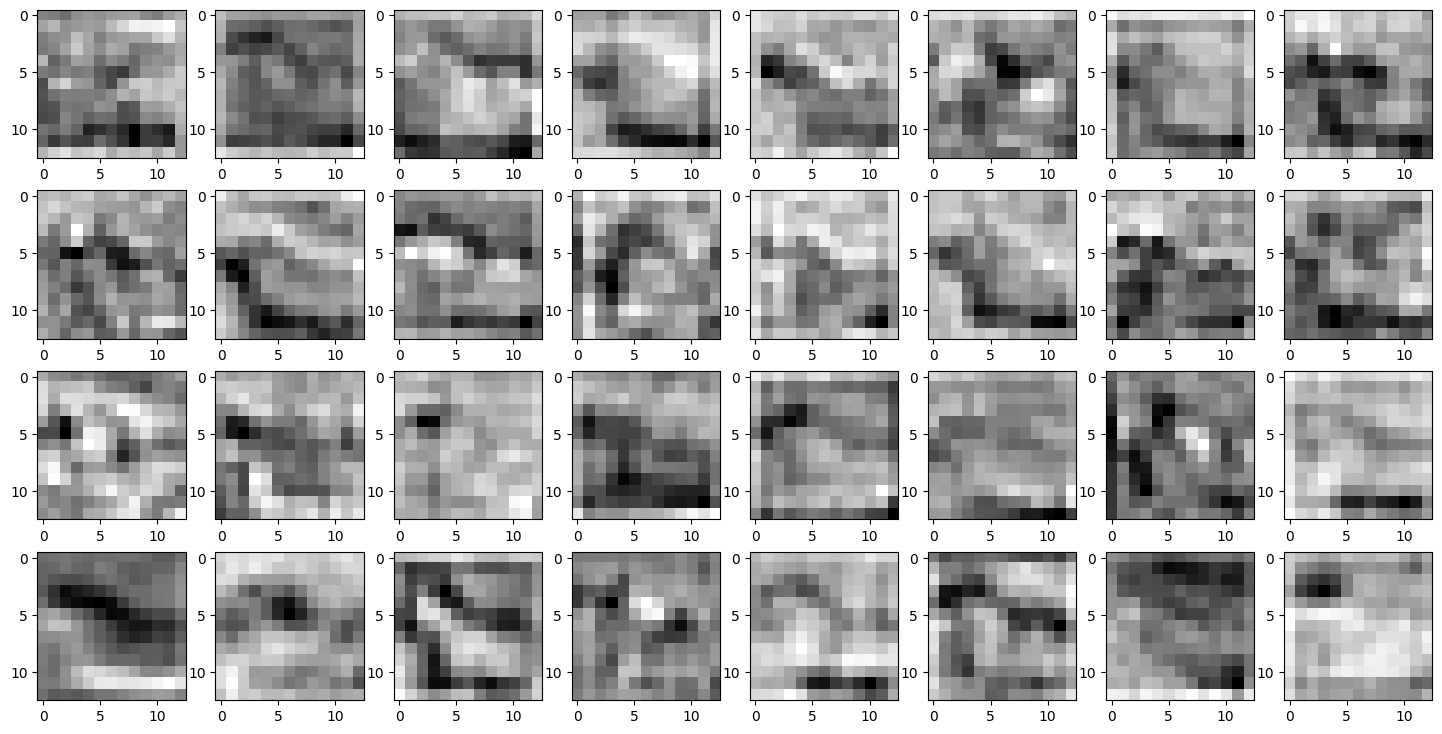

In [ ]:
conv3 = model.features[6]
conv3_out = conv3(conv2_out1)
print(conv3_out.shape)
imgArray=conv3_out[0].data.cpu().numpy()
fig=plt.figure(figsize=(18, 9))
for i in range(32): #visualize the first 32 channels
  fig.add_subplot(4, 8, i+1)
  plt.imshow(imgArray[i], cmap='gray')
plt.show()

torch.Size([1, 256, 13, 13])


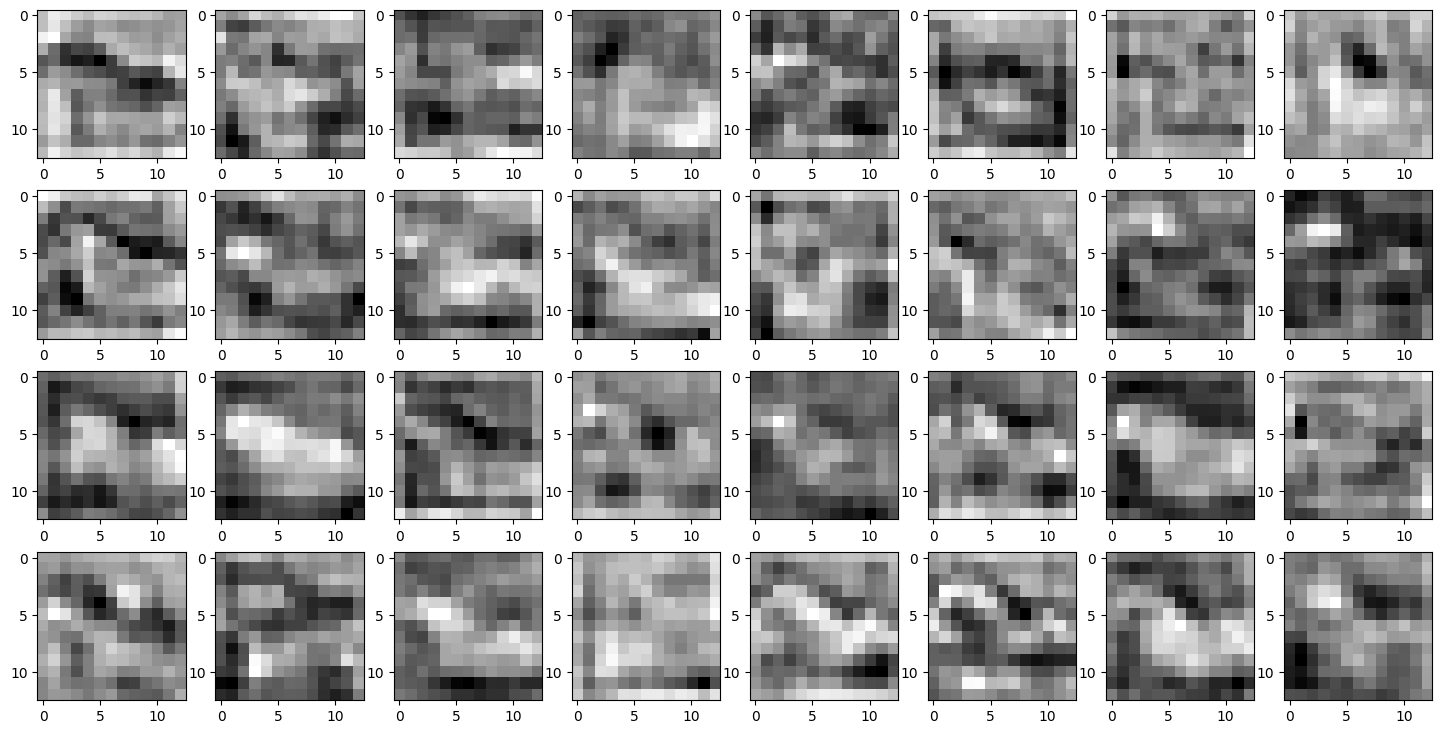

In [ ]:
#max pooling
conv3_pooling = model.features[7:9]
conv3_out1 = conv3_pooling(conv3_out)
print(conv3_out1.shape)
imgArray=conv3_out1[0].data.cpu().numpy()
fig=plt.figure(figsize=(18, 9))
for i in range(32): #visualize the first 32 channels
  fig.add_subplot(4, 8, i+1)
  plt.imshow(imgArray[i], cmap='gray')
plt.show()

#Pass input image through all convolution layers of AlexNet

In [ ]:
WholeConvLayers = model.features
out1 = WholeConvLayers(imageTensor.to(device))
print(out1.shape)

AvgPoolLayer = model.avgpool
out2 = AvgPoolLayer(out1)
print(out2.shape)

torch.Size([1, 256, 6, 6])
torch.Size([1, 256, 6, 6])


#Check the final classification result

In [ ]:
out = model(imageTensor.to(device))
print(out.shape)

torch.Size([1, 1000])


In [ ]:
torch.max(out)

tensor(16.5782, device='cuda:0', grad_fn=<MaxBackward1>)

In [ ]:
torch.argmax(out)

tensor(351, device='cuda:0')

https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a